In [5]:
import pandas as pd

pop=pd.read_csv("../sql/data/Population of Indian states 2025.csv")

print(pop.columns)
print(pop.head(10))


Index(['Rank', 'State/UT', 'Population 2025'], dtype='object')
  Rank        State/UT Population 2025
0    1   Uttar Pradesh     241,265,000
1    2           Bihar     131,041,000
2    3     Maharashtra     128,659,000
3    4     West Bengal     100,202,000
4    5  Madhya Pradesh      88,985,000
5    6       Rajasthan      83,060,000
6    7      Tamil Nadu      77,394,000
7    8         Gujarat      73,513,000
8    9       Karnataka      68,679,000
9   10  Andhra Pradesh      53,586,000


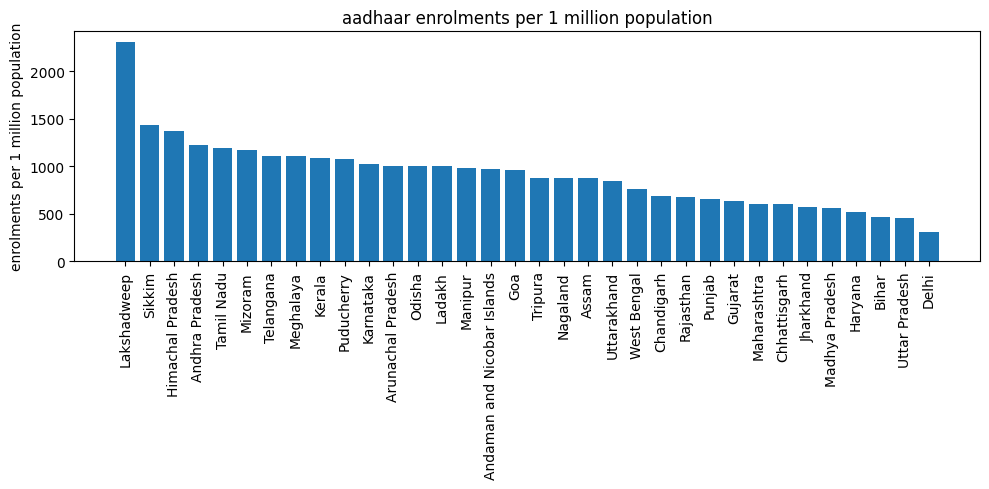

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# enrolments
enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")

enrolments=(
    enrolment_df
    .groupby("state")
    .size()
    .rename("enrolments")
    .reset_index()
)

# population (FIXED)
population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")

population=population.rename(columns={
    "State/UT":"state",
    "Population 2025":"population"
})

population["population"]=(
    population["population"]
    .astype(str)
    .str.replace(",","")
    .astype(int)
)

# merge
df=enrolments.merge(population,on="state",how="inner")

# metric
df["enrolments_per_million"]=(df["enrolments"]/df["population"])*1_000_000
df=df.sort_values("enrolments_per_million",ascending=False)

# plot
plt.figure(figsize=(10,5))
plt.bar(df["state"],df["enrolments_per_million"])
plt.xticks(rotation=90)
plt.ylabel("enrolments per 1 million population")
plt.title("aadhaar enrolments per 1 million population")
plt.tight_layout()
plt.show()
